In [4]:
%run project.py

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread (0x4554570).
Cannot move to target thread (0x1cea2e0)

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread (0x4554570).
Cannot move to target thread (0x1cea2e0)

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread (0x4554570).
Cannot move to target thread (0x1cea2e0)

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread (0x4554570).
Cannot move to target thread (0x1cea2e0)

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread (0x4554570).
Cannot move to target thread (0x1cea2e0)

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread (0x4554570).
Cannot move to target thread (0x1cea2e0)

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread (0x4554570).
Cannot move to target thread (0x1cea2e0)

QObject::moveToThread: Current thread (0x1cea2e0) is not the object's thread

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [127]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

#model = RandomForestClassifier()
model = RandomForestClassifier(max_depth=3,random_state=32)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)
score_2 = accuracy_score(model.predict(x_train), y_train)
print(score_2*100)
score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))

f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()


100.0
100.0% of samples were classified correctly !


In [87]:
y_test_A = (y_test == '1')

In [88]:
x_train.shape

(480, 42)

In [89]:
y_probas_forest = cross_val_predict(model, x_test, y_test_A, cv=3,
                                    method="predict_proba")

In [91]:
y_scores_forest = y_probas_forest[: , 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_test_A , y_scores_forest)


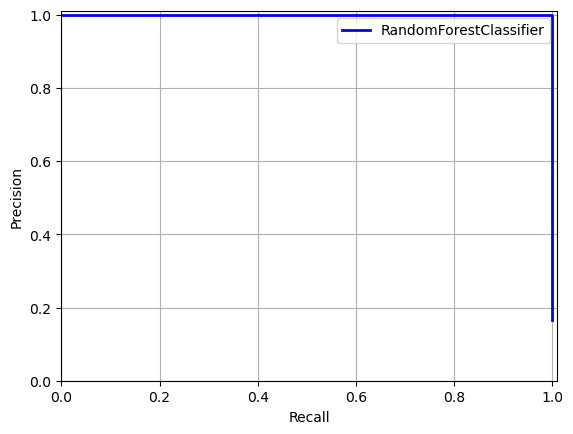

In [113]:
import matplotlib.pyplot as plt

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="RandomForestClassifier")
#plt.plot(recalls,precisions, '--',label = "SGDClassifier")

plt.grid()
plt.legend()
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.xlabel('Recall')
plt.ylabel('Precision');

In [95]:


from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(model,x_train,y_train_A,cv=3) 


In [99]:


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_A, y_scores)
precisions, recalls, thresholds = precision_recall_curve(y_train_A, y_scores)

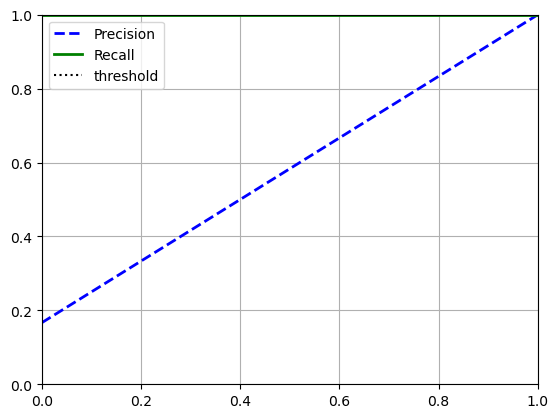

In [100]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# [:-1] here because the precision values and recall values are greater than thresolds by 1

plt.vlines(3000, 0, 1.0, "k", "dotted", label="threshold") # this to show our previously chosen threshold of 3000 (it seems bad choice)
plt.grid()
plt.legend() 
plt.xlim([min(thresholds),max(thresholds)])
plt.ylim(0,1)
plt.show()


In [102]:
desired_threshold_idx = np.argmax( (precisions > 0.9) )
desired_threshold_90_precision = thresholds[desired_threshold_idx]
desired_threshold_90_precision

True

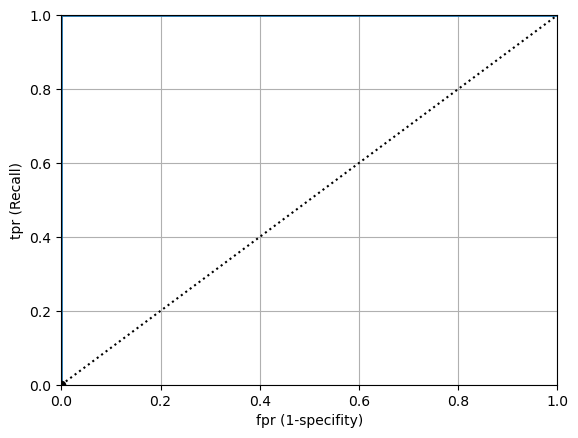

In [103]:
idx_for_threshold_at_90 = (thresholds <= desired_threshold_90_precision).argmax()
tpr_90 , fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision");
plt.grid()
plt.xlabel("fpr (1-specifity)")
plt.ylabel("tpr (Recall)")
plt.xlim(0,1)
plt.ylim(0,1);

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


y_scores = cross_val_predict(model,x_train,y_train_A,cv=3) 

In [45]:
y_scores

array([False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False,

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_train_A, y_scores)


In [37]:
y_scores.shape

(480,)

In [6]:
y_2 = model.predict(x_train)

In [117]:
confusion_matrix(y_train,y_2)

array([[10, 16, 14, 14, 18,  8],
       [10, 12, 16, 17,  8, 17],
       [22, 12,  9, 13, 13, 11],
       [ 9, 22, 14, 13,  9, 13],
       [15,  4, 18, 12, 13, 18],
       [14, 14,  9, 11, 19, 13]])

In [3]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train,y_predict)
cm

ValueError: Found input variables with inconsistent numbers of samples: [480, 120]

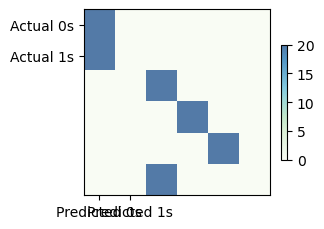

In [122]:
cm = confusion_matrix(y_test,model.predict(x_train))

fig,ax = plt.subplots(1,1,figsize =(3,3))
c = ax.imshow(cm,cmap='GnBu', alpha = 0.7)
cp = ax.figure.colorbar(c, ax = ax, shrink=0.5) # set the guiding bar "something like the legend for the heatmap"

# ax.axis('off')  or ax.axis(False)

#ax.set_xlabel(("Predicted 0s","Predicted 1s"))    ==> this will label the axes but without order 
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0s","Predicted 1s"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0s","Actual 1s"));

for i in range(5):
    for j in range(5):
        ax.text(i,j,s=cm[j,i])
plt.show();

In [4]:
%run create_dataset.py


In [5]:
%run train_classifier.py

100.0% of samples were classified correctly !


In [3]:
from gtts import gTTS
from playsound import playsound 

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [1]:
import pickle
import os
from gtts import gTTS
from playsound import playsound 

from datetime import datetime

import cv2
import mediapipe as mp
import numpy as np

model_dict = pickle.load(open('./model.p', 'rb'))
model = model_dict['model']

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

labels_dict = {0: 'A', 1: 'C', 2: 'W', 3:'L' , 4:'H', 5:'I'}

word_list = [""]
text = " "

last_detected = datetime.now()
predicted_character = ""
while True:    

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        prediction = model.predict([np.asarray(data_aux)])

        predicted_character = labels_dict[int(prediction[0])]
   

    #text = word_list[0]+"".join([word_list[i] for i in range(1,len(word_list)) if word_list[i]!= word_list[i-1]])
    #text = "".join(word_list)
    #cv2.putText(frame, "Detected Output is: "+text, (30, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
            #cv2.LINE_AA)    
        
    

    
    
    
    
    
    
    
    
    
    if cv2.waitKey(1) & 0xFF==ord('a') :     # appending a letter to the word list 
        
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
        cv2.putText(frame, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                    cv2.LINE_AA)

        word_list.append(predicted_character)
        
    if cv2.waitKey(1) & 0xFF==ord('s'):     # appending a space to the word list to separate the words
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
        cv2.putText(frame, "Dilimeter", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                    cv2.LINE_AA)
        word_list.append(" ")
        

#     #else:
#     #    cv2.imshow('frame', frame)
    
#     if cv2.waitKey(1) & 0xFF==ord('d'):    # display the whole sentence
#         print(word_list)
#         text ="".join(word_list)
#         cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
#                     cv2.LINE_AA)
        
#         g = gTTS(text=text , lang= 'en')
#         g.save('audio.mp3')
#         playsound('audio.mp3')

#         # removing unused files.
#         os.remove('audio.mp3')
#         word_list = []
    
     
    if cv2.waitKey(1) & 0xFF==ord('w'):     
        text = word_list[0]+"".join([word_list[i] for i in range(1,len(word_list)) if word_list[i]!= word_list[i-1]])+"L"
        cv2.putText(frame, f"Detected Output is: {text}", (20, 100 ), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3,
                cv2.LINE_AA)

    if cv2.waitKey(1) & 0xFF==ord('q'):   #quitting the webcam
        cap.release()
        break
        
    
    
    cv2.imshow('frame', frame)
g = gTTS(text=text , lang= 'en')
g.save('audio.mp3')
playsound('audio.mp3')

# removing unused files.

word_list = []    
    
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

os.remove('audio.mp3')


#text = "".join(word_list)
#cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
            #cv2.LINE_AA)

    
    
    
    
    
# g = gTTS(text=text , lang= 'en')
# g.save('audio.mp3')
# playsound('audio.mp3')

# # removing unused files.
# os.remove('audio.mp3')
# word_list = []

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
QObject::moveToThread: Current thread (0x2c9e9f0) is not the object's thread (0x3f61780).
Cannot move to target thread (0x2c9e9f0)

QObject::moveToThread: Current thread (0x2c9e9f0) is not the object's thread (0x3f61780).
Cannot move to target thread (0x2c9e9f0)

QObject::moveToThread: Current thread (0x2c9e9f0) is not the object's thread (0x3f61780).
Cannot move to target thread (0x2c9e9f0)

QObject::moveToThread: Current thread (0x2c9e9f0) is not the object's thread (0x3f61780).
Cannot move to target thread (0x2c9e9f0)

QObject::moveToThread: Current thread (0x2c9e9f0) is not the object's thread (0x3f61780).
Cannot move to target thread (0x2c9e9f0)

QObject::moveToThread: Current thread (0x2c9e9f0) is not the object's thread (0x3f61780).
Cannot move to target thread (0x2c9e9f0)

QObject::moveToThre

ValueError: X has 84 features, but RandomForestClassifier is expecting 42 features as input.

In [2]:
word_list = ['H','i',',','A','A','A','A','L',"L"]
text = word_list[0]+"".join([word_list[i] for i in range(1,len(word_list)) if word_list[i]!= word_list[i-1]])
text

'Hi,AL'

In [ ]:
import os

import cv2


DATA_DIR = './data'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

number_of_classes = 3
dataset_size = 100

cap = cv2.VideoCapture(0)
for j in range(5,8):
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data for class {}'.format(j))

    done = False
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Ready? Press "Q" ! :)', (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3,
                    cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'):
            break

    counter = 0
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)
        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)

        counter += 1

cap.release()
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x3771f10) is not the object's thread (0x3789690).
Cannot move to target thread (0x3771f10)

QObject::moveToThread: Current thread (0x3771f10) is not the object's thread (0x3789690).
Cannot move to target thread (0x3771f10)

QObject::moveToThread: Current thread (0x3771f10) is not the object's thread (0x3789690).
Cannot move to target thread (0x3771f10)

QObject::moveToThread: Current thread (0x3771f10) is not the object's thread (0x3789690).
Cannot move to target thread (0x3771f10)

QObject::moveToThread: Current thread (0x3771f10) is not the object's thread (0x3789690).
Cannot move to target thread (0x3771f10)

QObject::moveToThread: Current thread (0x3771f10) is not the object's thread (0x3789690).
Cannot move to target thread (0x3771f10)

QObject::moveToThread: Current thread (0x3771f10) is not the object's thread (0x3789690).
Cannot move to target thread (0x3771f10)

QObject::moveToThread: Current thread (0x3771f10) is not the object's thread

In [4]:
%run train_classifier.py

100.0% of samples were classified correctly !
